In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

from wordcloud import WordCloud

# Classification for vectorised data

In [54]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

spam_df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/lazyprogrammer/data/spambase.data')

if spam_df.isna().sum().max() == 0:
  print('There is no NA values')
else:
  print(f'There are {spam_df.isna().sum().max()} NAs' )

print(spam_df.shape)
spam_df.head()

Mounted at /content/gdrive/
There is no NA values
(4600, 58)


,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


In [55]:
spam_data = spam_df.values
X = spam_data[:,:48]
Y = spam_data[:,-1]

# last 100 rows will be test
Xtrain = X[:-100,]
Ytrain = Y[:-100,]
Xtest = X[-100:,]
Ytest = Y[-100:,]

In [56]:
nb_model = MultinomialNB()
nb_model.fit(Xtrain, Ytrain)
print('Naive bayes train model accuracy:', nb_model.score(Xtrain, Ytrain))
print('Naive bayes test model accuracy:', nb_model.score(Xtest, Ytest))

ab_model = AdaBoostClassifier()
ab_model.fit(Xtrain, Ytrain)
print('Adaboost train model accuracy:', ab_model.score(Xtrain, Ytrain))
print('Adaboost test model accuracy:', ab_model.score(Xtest, Ytest))

Naive bayes train model accuracy: 0.8702222222222222
Naive bayes test model accuracy: 0.75
Adaboost train model accuracy: 0.9317777777777778
Adaboost test model accuracy: 0.97


# Classification for sms texts

In [57]:
#from google.colab import drive
#drive.mount('/content/gdrive/', force_remount=True)

sms_df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/lazyprogrammer/data/spam.csv', encoding='ISO-8859-1')

if sms_df.isna().sum().max() == 0:
  print('There is no NA values')
else:
  print(f'There are {sms_df.isna().sum().max()} NAs' )

sms_df = sms_df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
sms_df.columns = ['labels', 'data']

sms_df['b_labels'] = sms_df['labels'].map({'ham': 0, 'spam': 1})

print(sms_df.shape)
sms_df.head()

There are 5566 NAs
(5572, 3)


,labels,data,b_labels
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [58]:
X = sms_df['data'].values
Y = sms_df['b_labels'].values

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.33)

In [67]:
def test_models(feature_transformer):
  Xtrain_transformed = feature_transformer.fit_transform(Xtrain)
  Xtest_transformed = feature_transformer.transform(Xtest)

  nb_model = MultinomialNB()
  nb_model.fit(Xtrain_transformed, Ytrain)
  print('Naive bayes train model accuracy:', nb_model.score(Xtrain_transformed, Ytrain))
  print('Naive bayes test model accuracy:', nb_model.score(Xtest_transformed, Ytest))

  ab_model = AdaBoostClassifier()
  ab_model.fit(Xtrain_transformed, Ytrain)
  print('Adaboost train model accuracy:', ab_model.score(Xtrain_transformed, Ytrain))
  print('Adaboost test model accuracy:', ab_model.score(Xtest_transformed, Ytest))

In [68]:
print('using CountVectorizer...')
test_models(CountVectorizer())

print('\n')
print('using TfidfVectorizer...')
test_models(TfidfVectorizer())

using CountVectorizer...
Naive bayes train model accuracy: 0.993570854540584
Naive bayes test model accuracy: 0.9902120717781403
Adaboost train model accuracy: 0.9831234931690329
Adaboost test model accuracy: 0.9722675367047309


using TfidfVectorizer...
Naive bayes train model accuracy: 0.9697294401285829
Naive bayes test model accuracy: 0.9521479064709081
Adaboost train model accuracy: 0.9825877310474149
Adaboost test model accuracy: 0.967373572593801


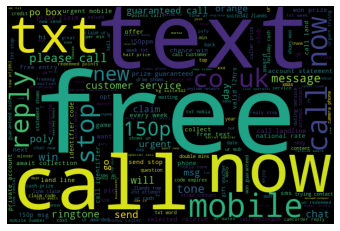

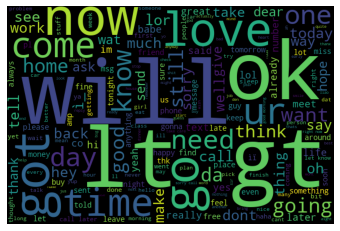

In [61]:
def visualize(label):
  words = ''
  for msg in sms_df[sms_df['labels'] == label]['data']:
    msg = msg.lower()
    words += msg + ' '
  wordcloud = WordCloud(width=600, height=400).generate(words)
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.show()

visualize('spam')
visualize('ham')